In [72]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from statistics import median, StatisticsError

In [73]:
table = pd.read_excel('09.21.xlsx')

# Общая оценка

Размеры датасета

In [74]:
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,3,NaN,NaN,NaN,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,4,NaN,NaN,NaN,Главный инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,5,NaN,NaN,NaN,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,6,NaN,NaN,NaN,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,7,NaN,NaN,NaN,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


In [75]:
print(table.shape)
print(len(table))

(20585, 8)
20585


Уникальные значения в столбцах

In [76]:
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].fillna('нет')
table['Ввод_данных'] = table['Ввод_данных'].fillna('нет')
table['Переход_по_ссылке'] = table['Переход_по_ссылке'].fillna('нет')
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,3,нет,нет,нет,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,4,нет,нет,нет,Главный инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,5,нет,нет,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,6,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,7,нет,нет,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


In [77]:
table['Переход_по_ссылке'].unique()

array(['нет', 'Осуществлён'], dtype=object)

In [78]:
table['Ввод_данных'].unique()

array(['нет', 'Введены'], dtype=object)

In [79]:
table['Сообщение_в_ЦПКБ'].unique()

array(['нет', 'Поступило'], dtype=object)

Заменяем длинные сообщения на численные эквиваленты

In [80]:
def change_data(msg: str) -> str:
    return 1 if msg.split()[0] in ['есть', 'Осуществлён', 'Введены', 'Поступило'] else 0

In [81]:
table['Ввод_данных'] = table['Ввод_данных'].map(change_data)
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,3,нет,0,нет,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
1,4,нет,0,нет,Главный инженер по сопровождению,ПАО Сбербанк (ЦА),"Блок ""Технологии""",1.0
2,5,нет,0,нет,Руководитель направления,ПАО Сбербанк (ЦА),"Блок ""Риски""",2.0
3,6,нет,0,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",3.0
4,7,нет,0,нет,Исполнительный директор,ПАО Сбербанк (ЦА),"Блок ""Технологии""",4.0


Проверяем результат

In [82]:
table['Ввод_данных'].unique()

array([0, 1], dtype=int64)

In [83]:
table['Переход_по_ссылке'] = table['Переход_по_ссылке'].map(change_data)
table['Сообщение_в_ЦПКБ'] = table['Сообщение_в_ЦПКБ'].map(change_data)

Корректируем названия блоков, убираем лишнии символы

In [84]:
def change_dep(dep: str) -> str:
    dep_temp = dep.split()
    return dep_temp[0] + " " + dep_temp[1].strip("\"")

In [85]:
table['Подразделение_3'] = table['Подразделение_3'].map(change_dep)

In [86]:
table.head()

,№,Переход_по_ссылке,Ввод_данных,Сообщение_в_ЦПКБ,Должность,Подразделение_2,Подразделение_3,Подразделение_4
0,3,0,0,0,Ведущий инженер по сопровождению,ПАО Сбербанк (ЦА),Блок Технологии,1.0
1,4,0,0,0,Главный инженер по сопровождению,ПАО Сбербанк (ЦА),Блок Технологии,1.0
2,5,0,0,0,Руководитель направления,ПАО Сбербанк (ЦА),Блок Риски,2.0
3,6,0,0,0,Исполнительный директор,ПАО Сбербанк (ЦА),Блок Технологии,3.0
4,7,0,0,0,Исполнительный директор,ПАО Сбербанк (ЦА),Блок Технологии,4.0


Подсчет сотрудников

In [87]:
table.value_counts('Должность')

Должность
Руководитель направления                                                       4966
Главный инженер по разработке                                                  2395
Исполнительный директор                                                        1399
Менеджер                                                                       1159
Эксперт                                                                         881
                                                                               ... 
Вице-президент-руководитель дирекции                                              1
Бизнес-партнер по информационной безопасности экосистемы                          1
Главный электромеханик                                                            1
Бизнес-партнер по управлению процессами                                           1
Исполнительный директор, заместитель начальника управления-начальник отдела       1
Length: 294, dtype: int64

In [88]:
len(table.value_counts('Должность'))

294

Подсчет блоков

In [89]:
table.value_counts('Подразделение_3')

Подразделение_3
Блок Технологии                     11708
Блок Корпоративно-инвестиционный     2279
Блок Розничный                       1309
Блок Сервисы                         1185
Блок Финансы                          636
Другие подразделения                  599
Подразделения вне                     572
Блок Риски                            512
Блок Сеть                             438
Блок Управление                       408
Блок GR,                              401
Блок HR                               397
Блок Стратегия                         82
Блок Sberbank                          58
Старая структура                        1
dtype: int64

In [90]:
len(table.value_counts('Подразделение_3'))

15

# Рассмотрение всех исходов

Класс для того, чтобы сохранить описание каждого конкретного варианта. Можно расширить и добавить дополнительные критерии для оценки. Worker_rate - топ сотрудников, deaprtment_rate - топ блоков, percentw_rate и percentd_rate - топы переведенные в проценты

In [91]:
class EndDescribe:
    def __init__(self):
        self.num = 0
        self.table_len = 0
        self.worker_rate = []
        self.department_rate = []
        self.percentw_rate = []
        self.percentd_rate = []
        
    def get_percent(self, rate_list: dict) -> dict:
        cur_len = sum(rate_list.values())
        percent_val = list(map(lambda item: float("{0:.3f}".format((item / cur_len) * 100)), rate_list.values()))
        return {key: val for key, val in zip(rate_list.keys(), percent_val)}
        
        

Функция проверки и заполнения каждого из возможных исходов. При расширении класса, необходимо добавить сюда вычисления добавленных характеристик. Возвращает объект типа EndDescribe для полученного на вход исхода

In [92]:
def check_end(cur_end: tuple) -> EndDescribe:
    cur_table = table.query(f'Переход_по_ссылке == {cur_end[0]} & Ввод_данных == {cur_end[1]} & Сообщение_в_ЦПКБ == {cur_end[2]}')
    cur_dscrb = EndDescribe()
    cur_dscrb.table_len = len(cur_table)
    cur_dscrb.worker_rate = cur_table.value_counts('Должность')
    cur_dscrb.department_rate = cur_table.value_counts('Подразделение_3')
    cur_dscrb.percentw_rate = cur_dscrb.get_percent(dict(cur_dscrb.worker_rate.items()))
    cur_dscrb.percentd_rate = cur_dscrb.get_percent(dict(cur_dscrb.department_rate.items()))
    
    return cur_dscrb

Множество всех исходов, 1 - есть 0 - нет. Каждый вектор обозначает один из возможных исходов. То есть, например, вектор (0, 0, 0) - обозначает полное игнорирование письма, а вектор (1, 0, 0) - означает только переход по ссылке. 

In [93]:
codes = [(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Список объектов с описаниями всех возможных исходов

In [94]:
possible_ends = {code: check_end(code) for code in codes}

Общее распределение всех исходов

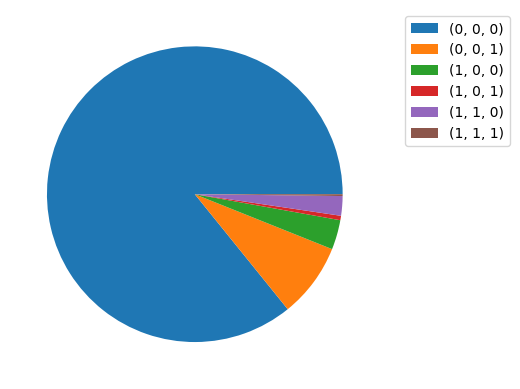

In [95]:
gen_len = len(table)

plt.pie([(end.table_len / gen_len) * 100 for end in possible_ends.values()])

plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Топ 10 сотрудников по численности

In [96]:
top_workers = table.value_counts('Должность')[:10]
top_workers

Должность
Руководитель направления            4966
Главный инженер по разработке       2395
Исполнительный директор             1399
Менеджер                            1159
Эксперт                              881
Руководитель проектов                855
Ведущий инженер по разработке        781
Главный инженер                      517
Ведущий инженер по сопровождению     500
Ведущий инженер                      491
dtype: int64

Топ 10 популярных должностей - 70% от общего количества

In [97]:
float("{0:.3f}".format((sum(top_workers.values)/sum(table.value_counts('Должность'))) * 100))

67.739

Топ 10 должностей в каждом варианте

In [98]:
worker_rate = {key: val.worker_rate[:10] for key, val in possible_ends.items()}
for key, val in worker_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Должность
Руководитель направления            4144
Главный инженер по разработке       2107
Исполнительный директор             1154
Менеджер                             992
Эксперт                              785
Руководитель проектов                734
Ведущий инженер по разработке        699
Ведущий инженер по сопровождению     463
Главный инженер                      456
Ведущий инженер                      445
dtype: int64


(0, 0, 1): 
Должность
Руководитель направления                    528
Главный инженер по разработке               196
Исполнительный директор                     151
Менеджер                                     77
Руководитель проектов                        65
Ведущий инженер по разработке                46
Главный инженер                              39
Главный специалист                           37
Старший эксперт по технологиям               34
Исполнительный директор-начальник отдела     30
dtype: int64


(1, 0, 0): 
Должность
Руководитель н

Распределение по исходам для топ 10 должностей на графиках

Руководитель направления


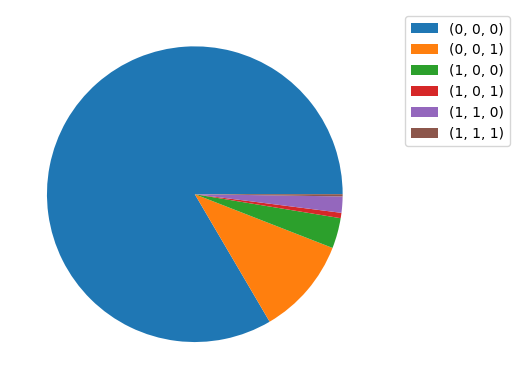

Главный инженер по разработке


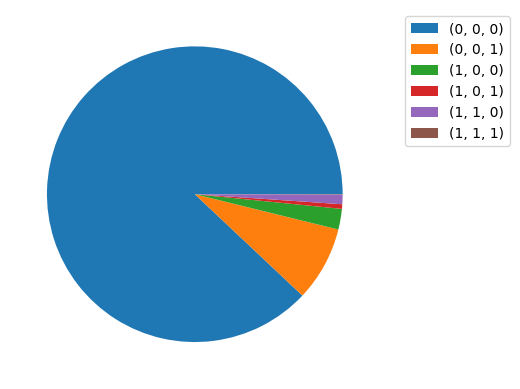

Исполнительный директор


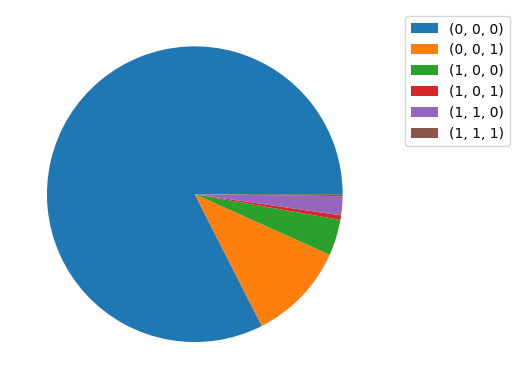

Менеджер


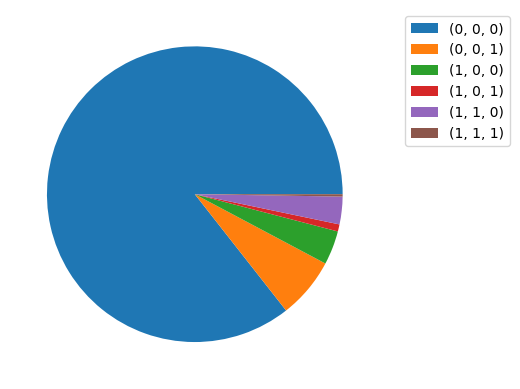

Эксперт


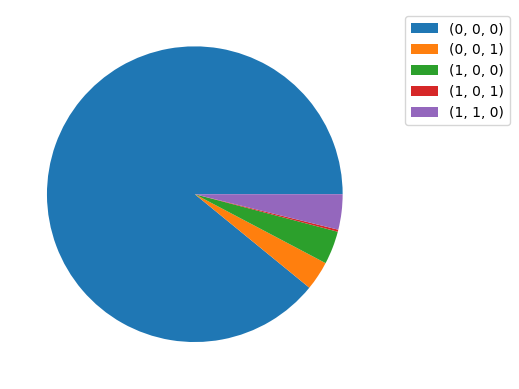

Руководитель проектов


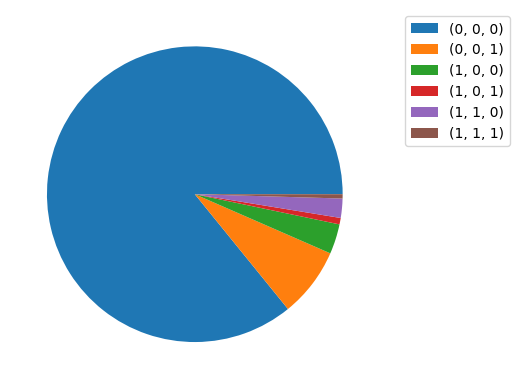

Ведущий инженер по разработке


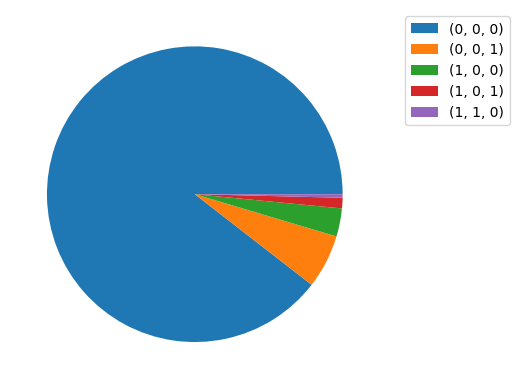

Главный инженер


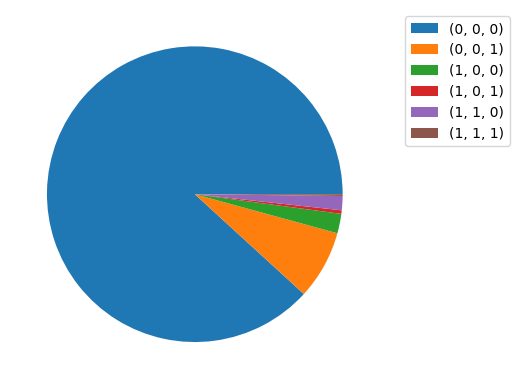

Ведущий инженер по сопровождению


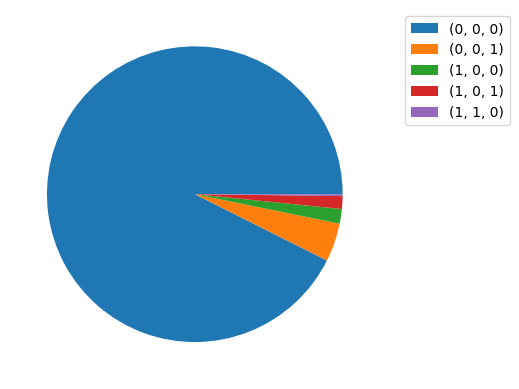

Ведущий инженер


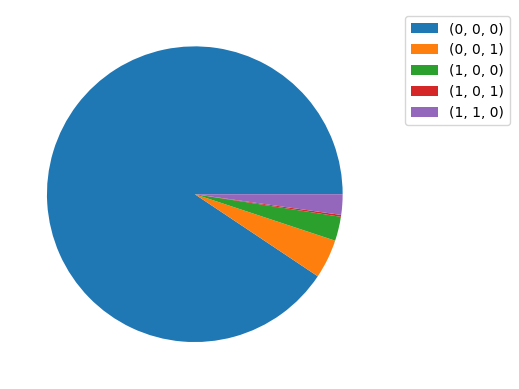

In [99]:
for worker in dict(top_workers).keys():
    print(worker)
    data_list = []
    for end in possible_ends.values():
        try:
            data_list.append(dict(end.worker_rate)[worker])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Топ 10 блоков по численности

In [100]:
top_departments = table.value_counts('Подразделение_3')[:10]
top_departments

Подразделение_3
Блок Технологии                     11708
Блок Корпоративно-инвестиционный     2279
Блок Розничный                       1309
Блок Сервисы                         1185
Блок Финансы                          636
Другие подразделения                  599
Подразделения вне                     572
Блок Риски                            512
Блок Сеть                             438
Блок Управление                       408
dtype: int64

Топ 10 блоков в каждом варианте

In [101]:
department_rate = {key: val.department_rate[:10] for key, val in possible_ends.items()}
for key, val in department_rate.items():
    print(f"{key}: \n{val}")
    print("\n")

(0, 0, 0): 
Подразделение_3
Блок Технологии                     10163
Блок Корпоративно-инвестиционный     1971
Блок Розничный                       1167
Блок Сервисы                          975
Блок Финансы                          568
Другие подразделения                  519
Подразделения вне                     500
Блок Сеть                             384
Блок HR                               351
Блок Управление                       351
dtype: int64


(0, 0, 1): 
Подразделение_3
Блок Технологии                     1002
Блок Риски                           214
Блок Корпоративно-инвестиционный     130
Блок Сервисы                          79
Блок Розничный                        52
Другие подразделения                  35
Блок GR,                              32
Подразделения вне                     30
Блок Сеть                             28
Блок HR                               23
dtype: int64


(1, 0, 0): 
Подразделение_3
Блок Технологии                     308
Блок Корпоративн

Распределение исходов для топ 10 блоков на графиках

Блок Технологии


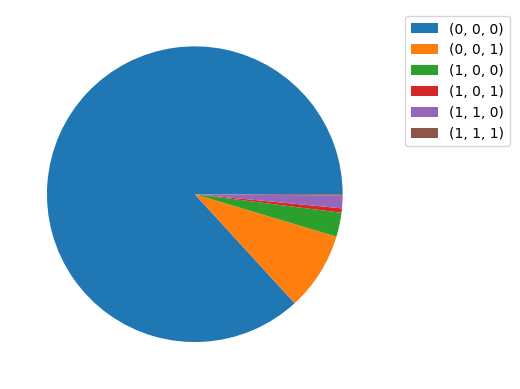

Блок Корпоративно-инвестиционный


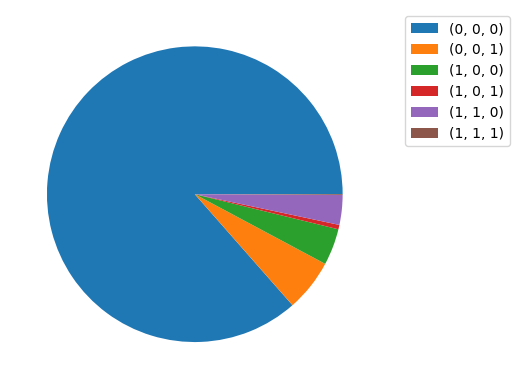

Блок Розничный


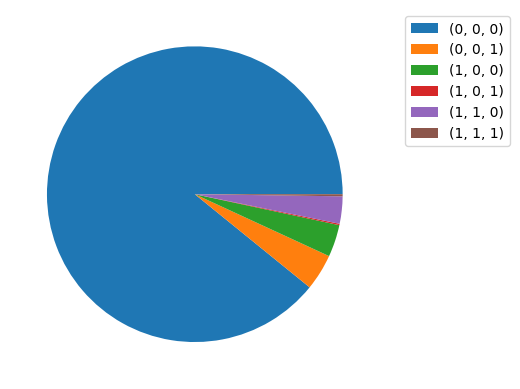

Блок Сервисы


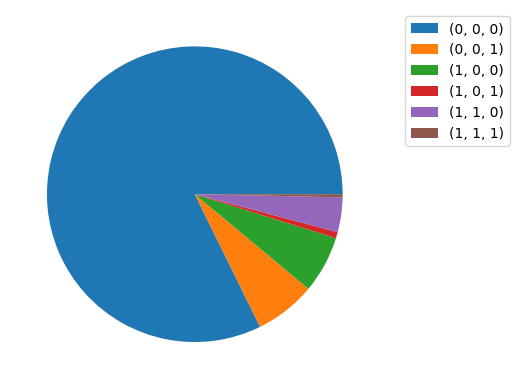

Блок Финансы


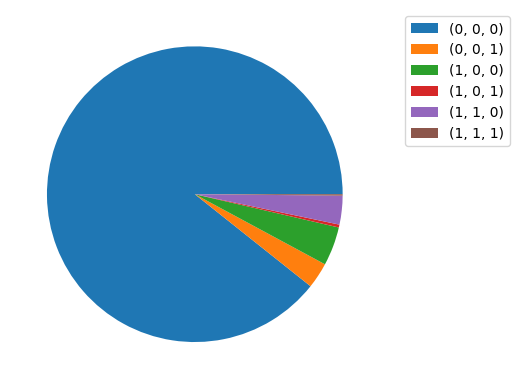

Другие подразделения


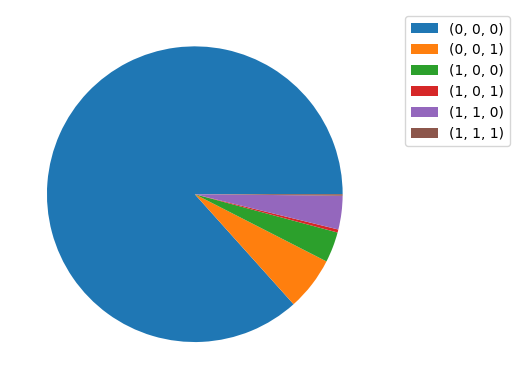

Подразделения вне


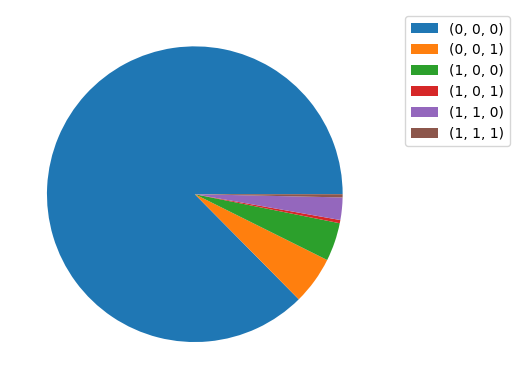

Блок Риски


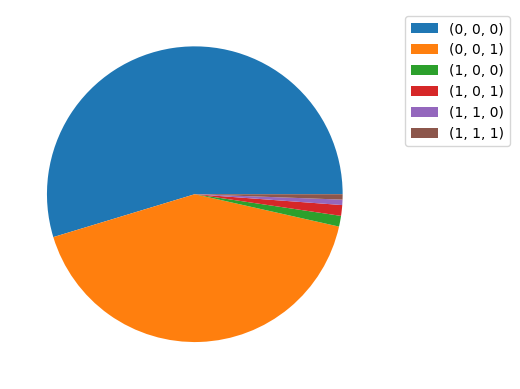

Блок Сеть


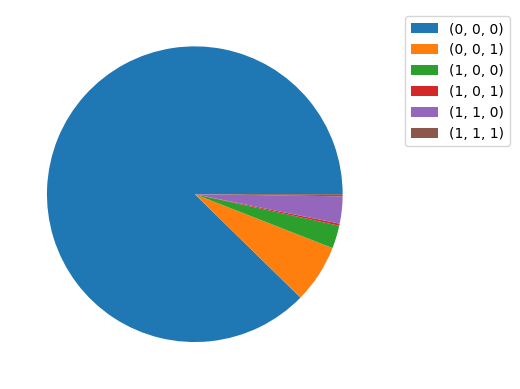

Блок Управление


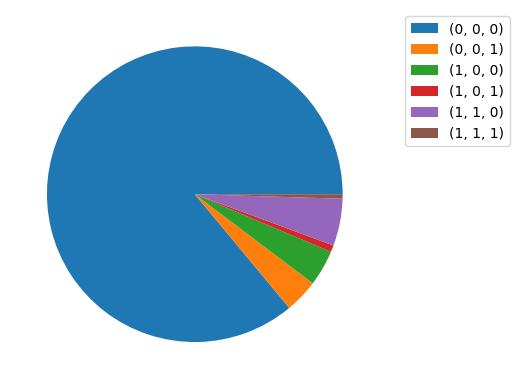

In [102]:
for department in dict(top_departments).keys():
    print(department)
    data_list = []
    for end in possible_ends.values():
        try:
            data_list.append(dict(end.department_rate)[department])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Сравненеи размера каждого исхода с общим размером

In [103]:
fit_workers = [(end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [104]:
other_workers = [100 - (end.table_len / len(table)) * 100 for end in possible_ends.values()]

In [105]:
indexes = [str(key) for key in possible_ends.keys()]
results = {"end": indexes, "Fit": fit_workers, "Other": other_workers}

df = pd.DataFrame(results, index=indexes)

In [106]:
df

,end,Fit,Other
"(0, 0, 0)","(0, 0, 0)",85.814914,14.185086
"(0, 0, 1)","(0, 0, 1)",8.127277,91.872723
"(1, 0, 0)","(1, 0, 0)",3.240223,96.759777
"(1, 0, 1)","(1, 0, 1)",0.480933,99.519067
"(1, 1, 0)","(1, 1, 0)",2.137479,97.862521
"(1, 1, 1)","(1, 1, 1)",0.199174,99.800826


Соотношение объема каждого исхода к общему объему на графике

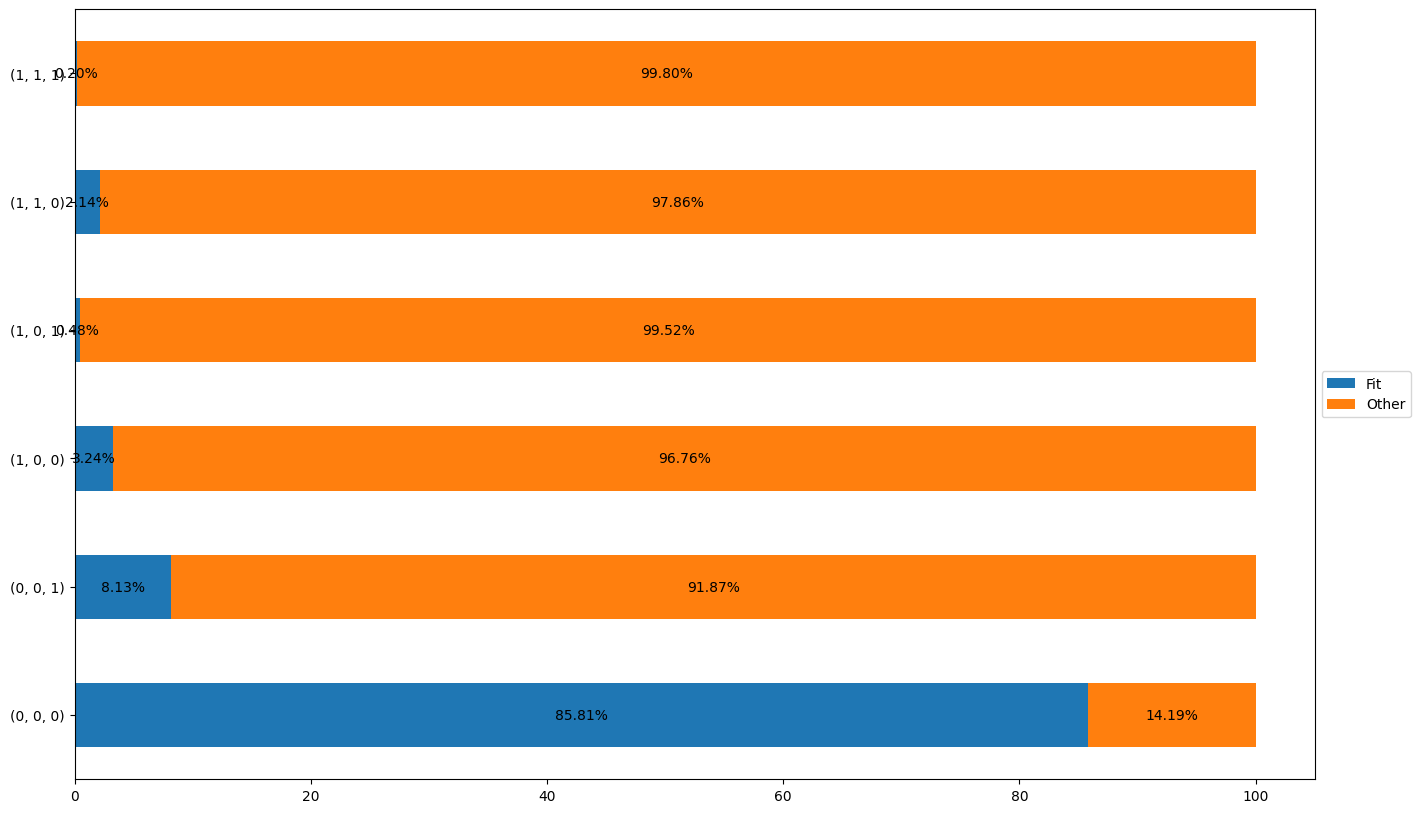

In [107]:
ax = df.plot.barh(stacked=True, figsize=(16, 10))

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width:0.2f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center')

Создание таблиц для более удобной обработки исходов

Таблица для топ 10 по популярности должностей

In [108]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
temp_table = table.drop(columns=['№', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4', 'Подразделение_2'])
top_work = list(dict(top_workers).keys())
temp_table = temp_table.loc[temp_table['Должность'].isin(top_work)]

Полная таблица для всех должностей

In [109]:
table['Исход'] = list(zip(table['Переход_по_ссылке'], table['Ввод_данных'], table['Сообщение_в_ЦПКБ']))
full_temp_table = table.drop(columns=['№', 'Переход_по_ссылке', 'Ввод_данных', 'Сообщение_в_ЦПКБ', 'Подразделение_4', 'Подразделение_2'])
top_work = table['Должность'].unique()
full_temp_table = full_temp_table.loc[full_temp_table['Должность'].isin(top_work)]

In [110]:
full_temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
1,Главный инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
20580,Главный инженер по разработке,Блок Технологии,"(0, 0, 0)"
20581,Старший эксперт по технологиям,Блок Технологии,"(0, 0, 1)"
20582,Директор проектов,Блок Сервисы,"(0, 0, 0)"
20583,Менеджер,Блок Технологии,"(0, 0, 0)"


In [111]:
full_temp_table['Исход'] = full_temp_table['Исход'].map(lambda cell: str(cell))

Распределение по исходам для топ 10 по популярности должностей в каждом отделе

Зададим условный код для каждого исхода, для более удобного представления на графиках. Соответствия кодов и исходов в словаре ниже:

In [112]:
def change_index(index: str) -> str:
    return {'(0, 0, 0)': 'I',
            '(1, 0, 0)': 'B1',
            '(1, 1, 0)': 'B2',
            '(1, 1, 1)': 'B3',
            '(0, 0, 1)': 'G',
            '(1, 0, 1)': 'B4'}[index]

In [113]:
def department_stat(department: str) -> None:
    print(department)
    department_temp = department.split()
    cur_table = full_temp_table.query(f'Подразделение_3 == "{department}"')
    cur_col = cur_table.value_counts('Должность')[:10]
    fig, axs = plt.subplots(2, 5, figsize=(17, 7))
    cur_row = 0
    for ind, worker in enumerate(cur_col.keys()):
        cur_worker_table = cur_table.query(f'Должность == "{worker}"')
        indexes = list(map(change_index, list(cur_worker_table.value_counts('Исход').keys())))
        if ind > 4:
            cur_row = 1
            axs[cur_row, ind - 5].bar(indexes, cur_worker_table.value_counts('Исход').values)
            axs[cur_row, ind - 5].set_title(worker, fontsize=9)
            continue
        axs[cur_row, ind].bar(indexes, cur_worker_table.value_counts('Исход').values)
        axs[cur_row, ind].set_title(worker, fontsize=9)
    plt.show()

Блок Технологии


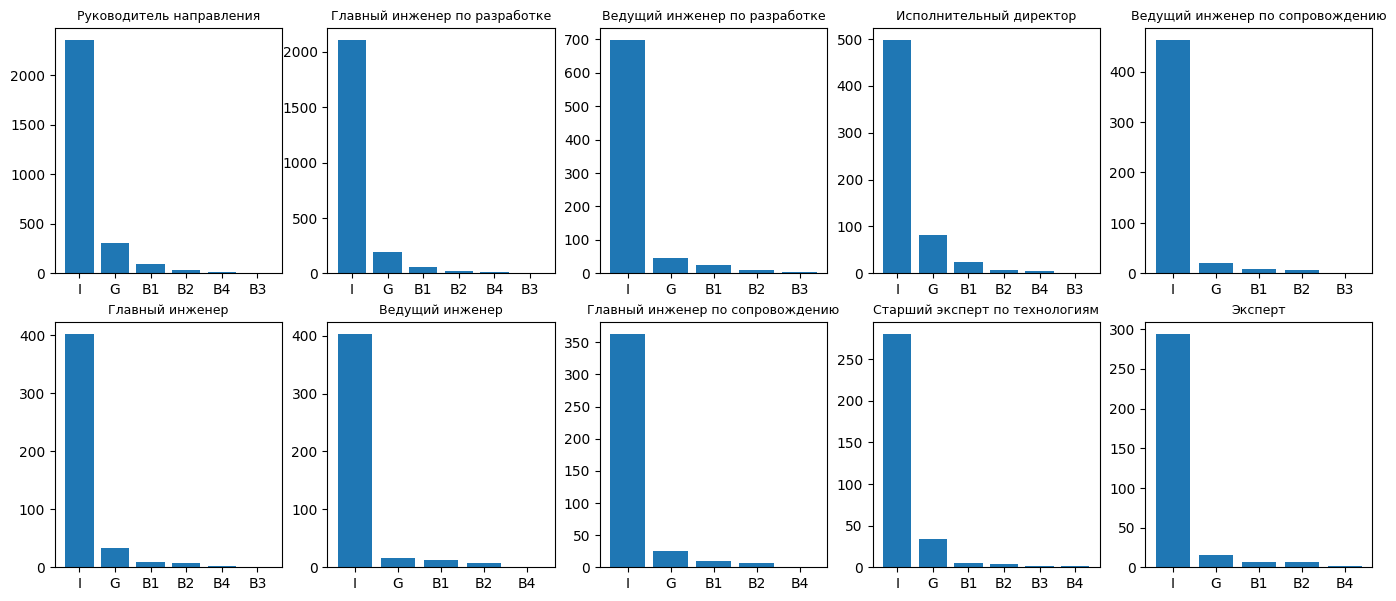

Блок Риски


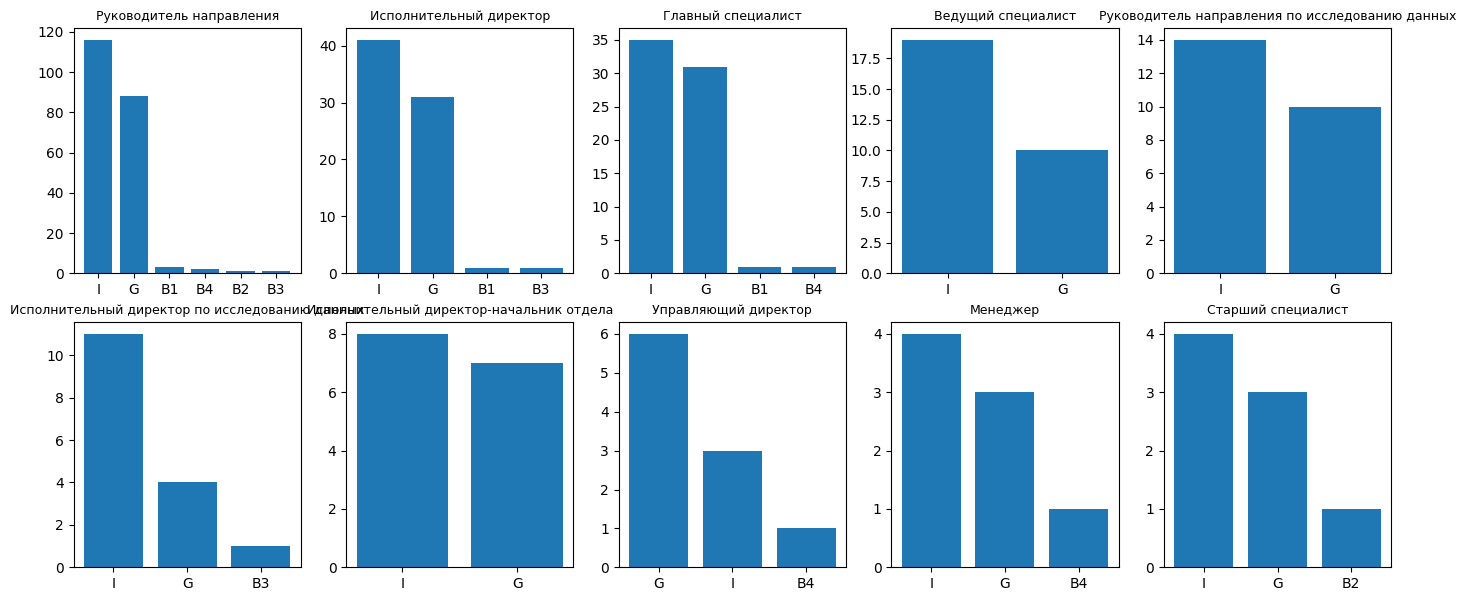

Другие подразделения


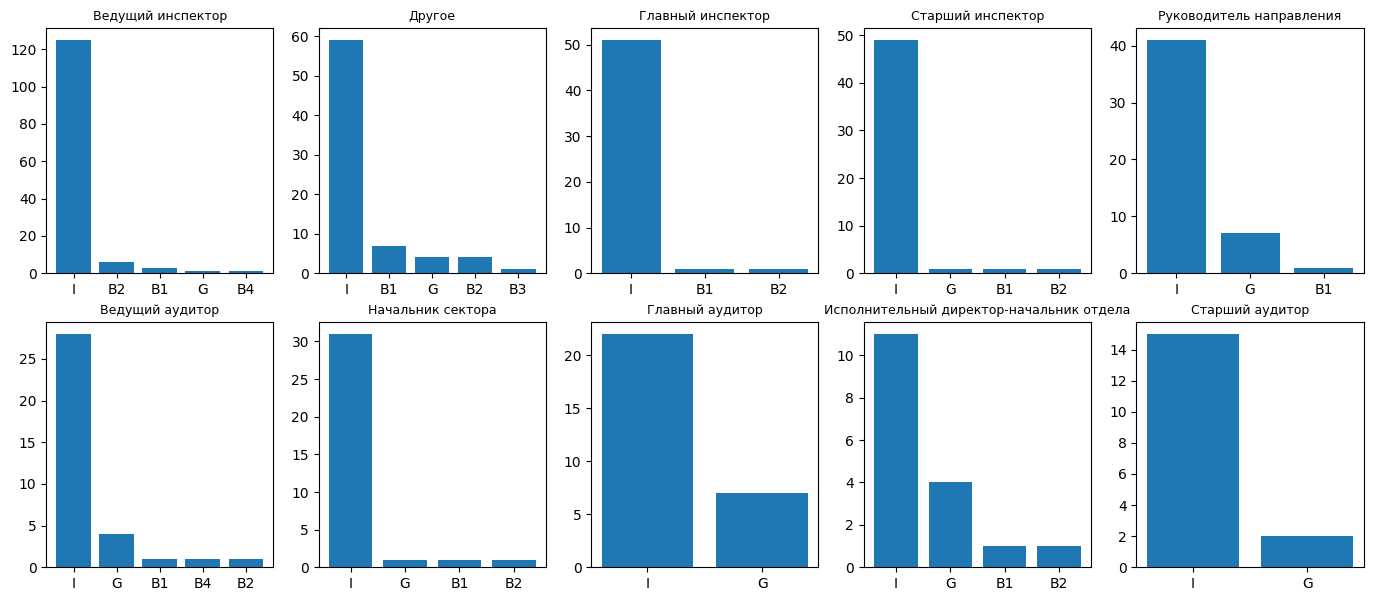

Блок HR


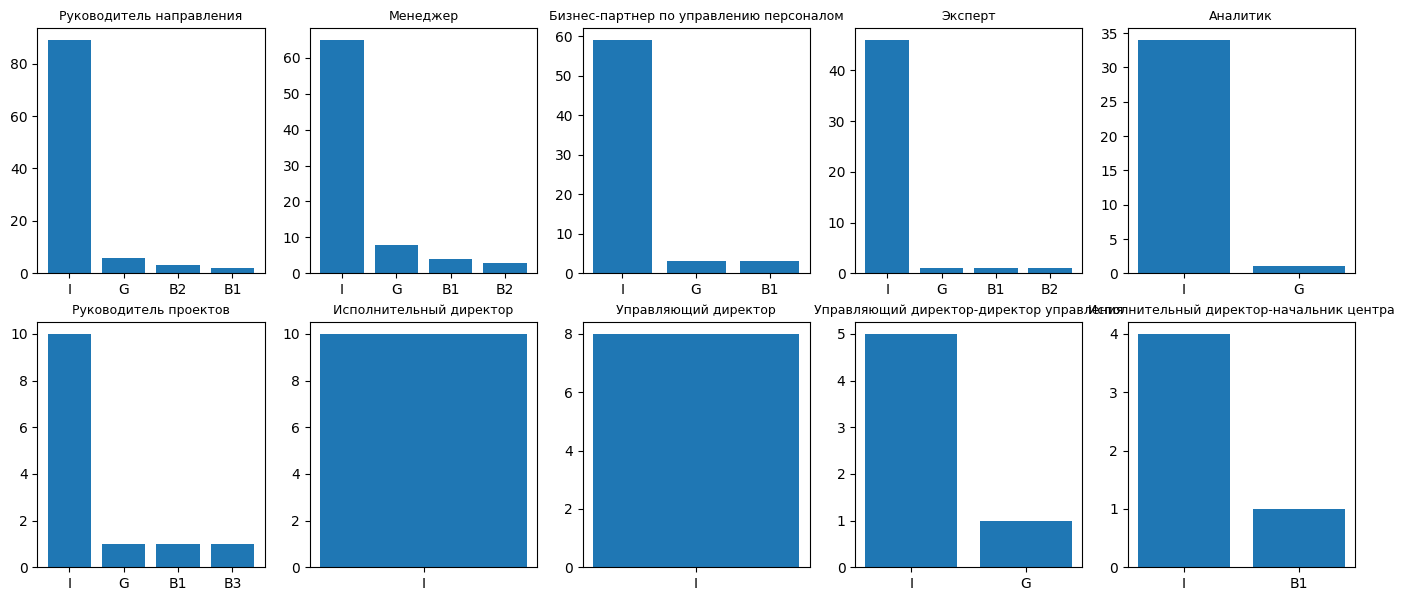

Блок Корпоративно-инвестиционный


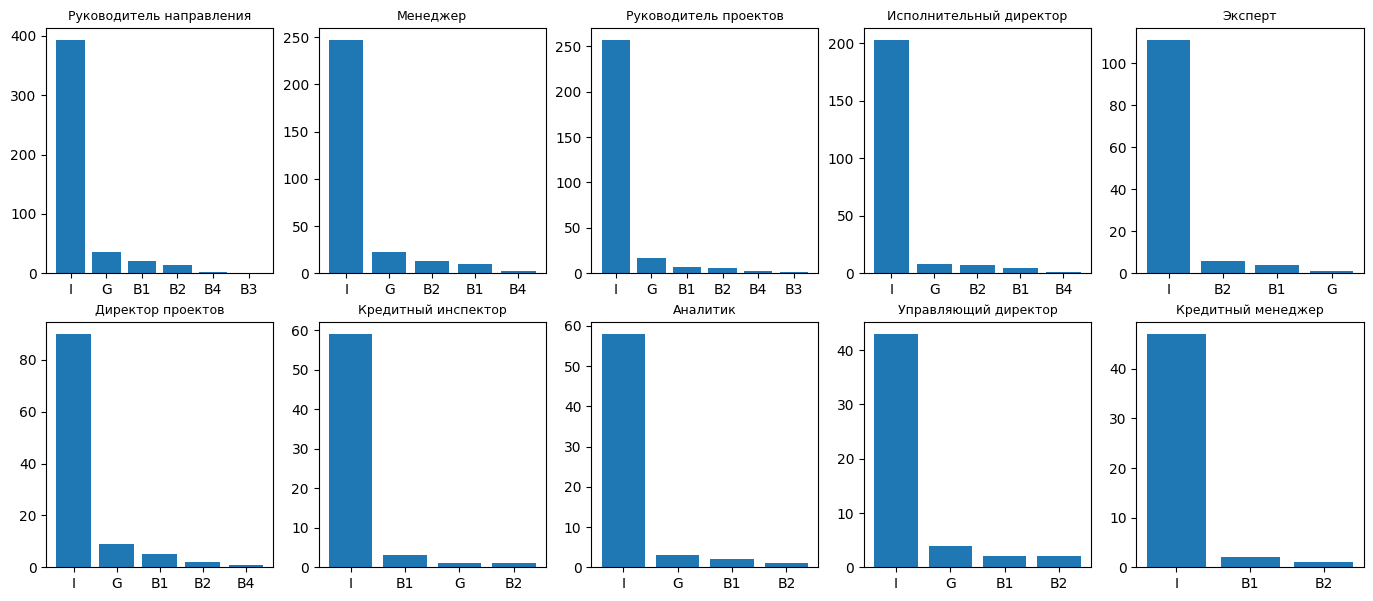

Блок GR,


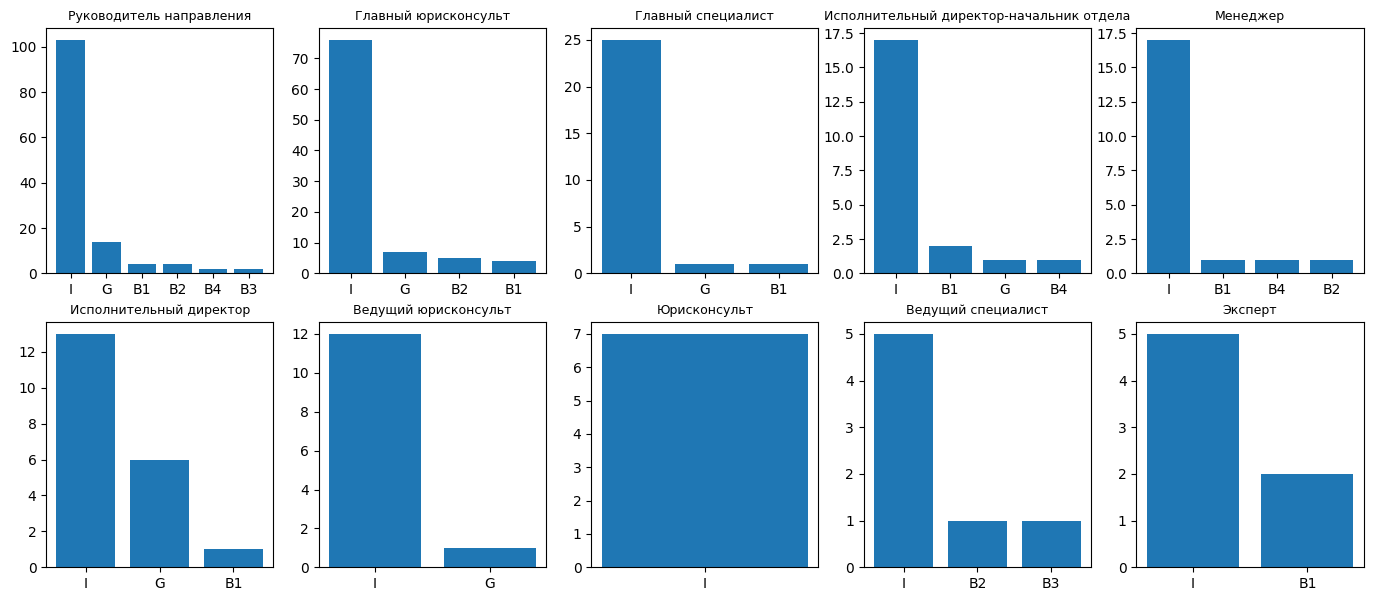

Блок Сервисы


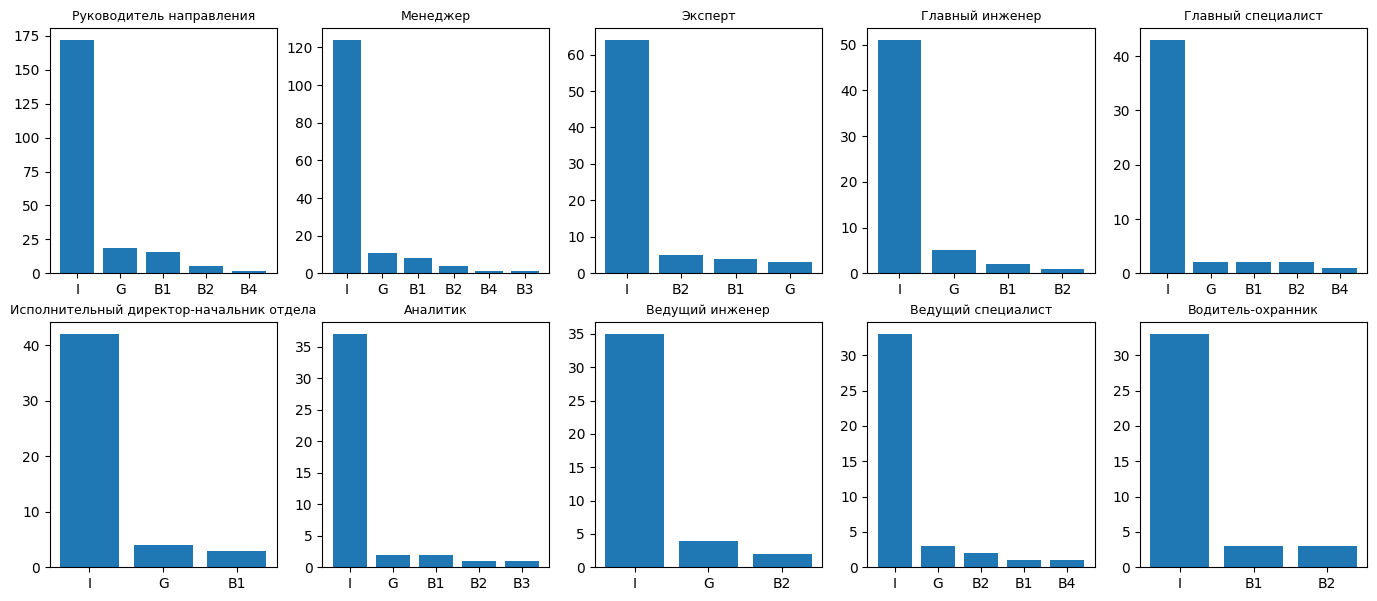

Блок Финансы


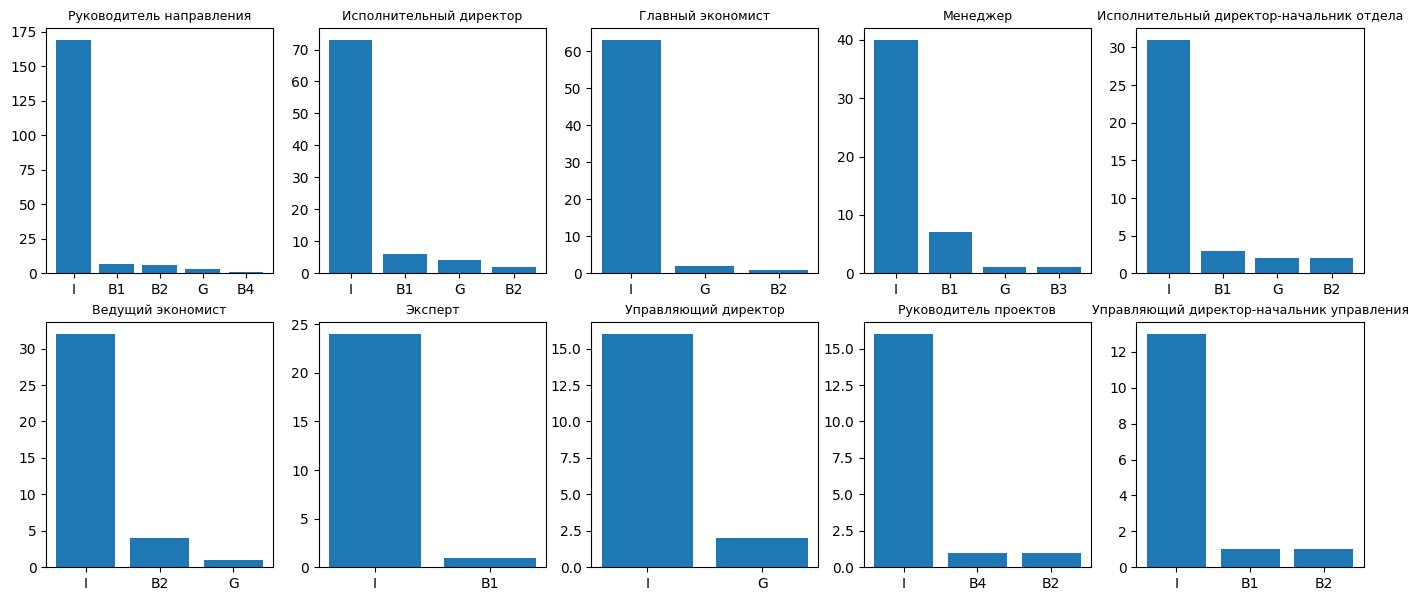

Блок Розничный


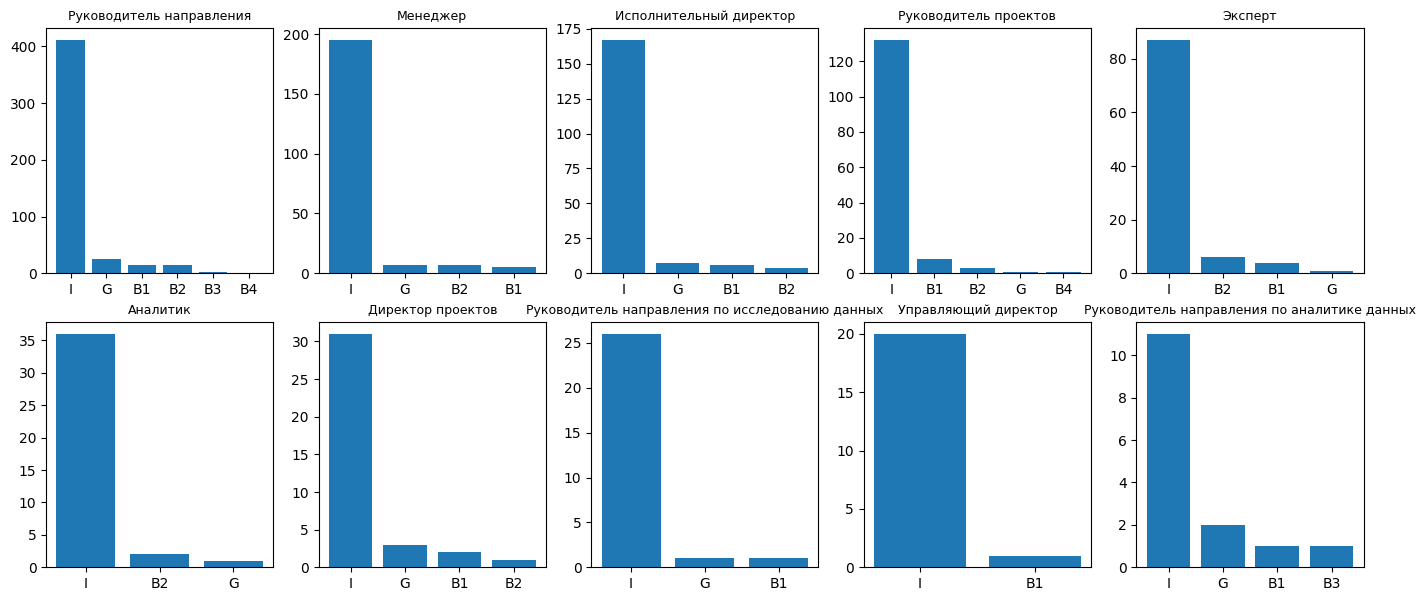

Подразделения вне


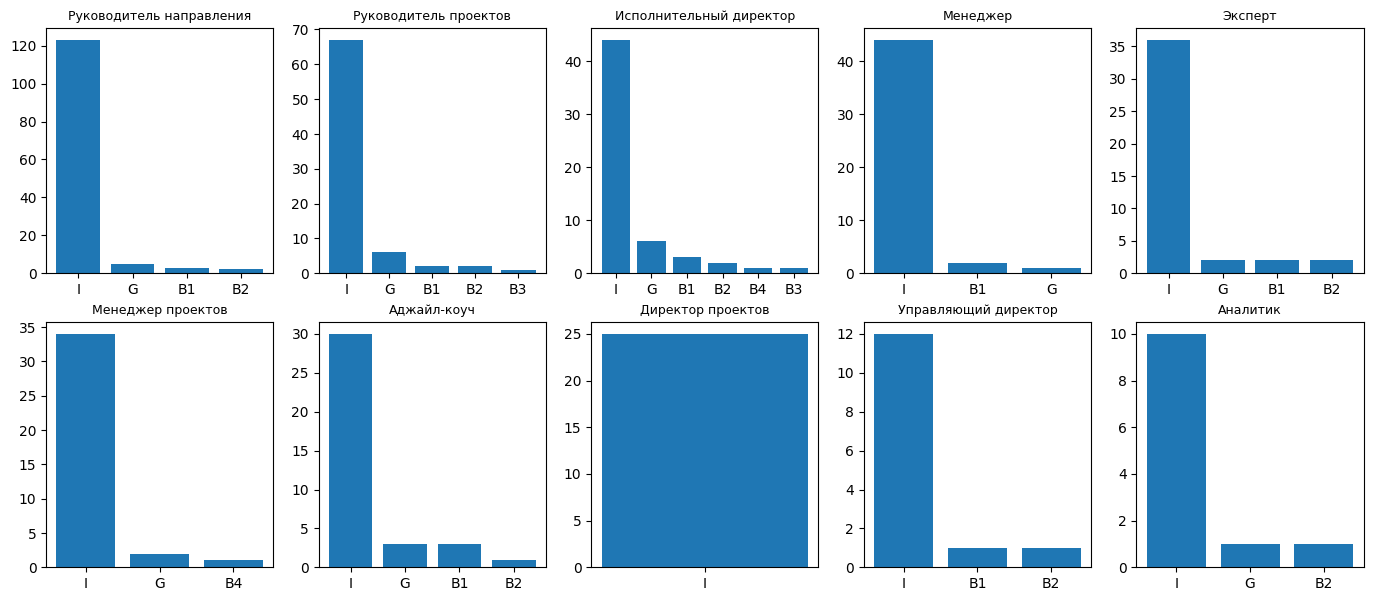

Блок Сеть


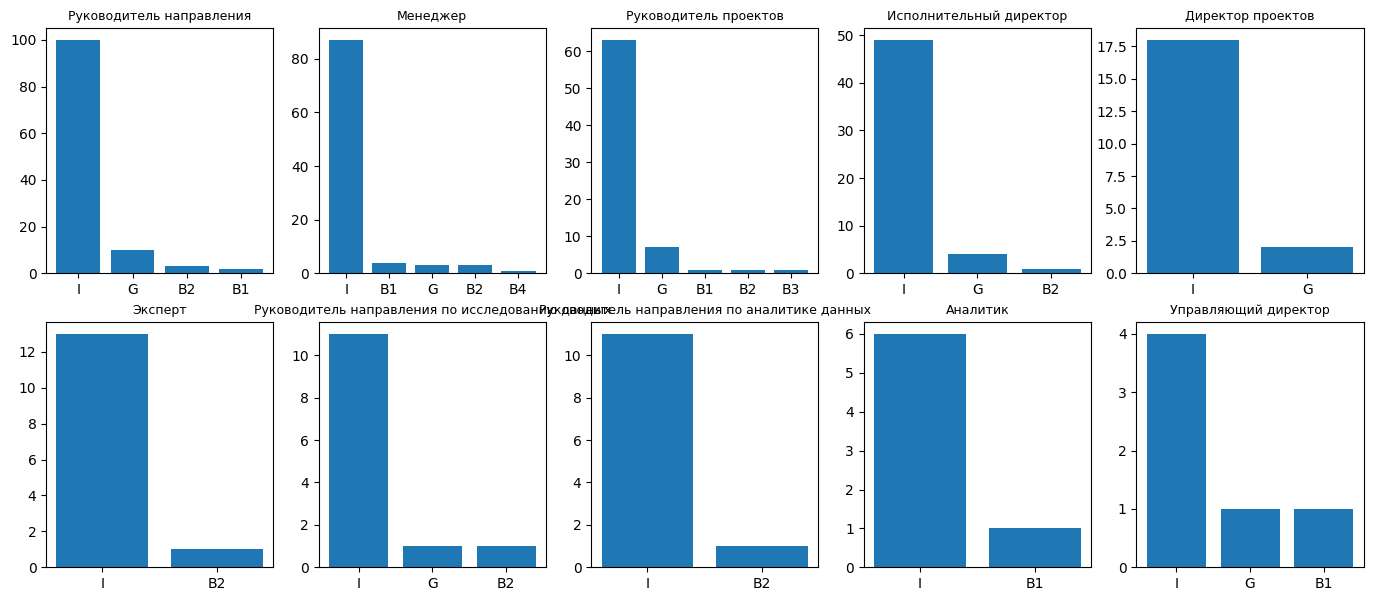

Блок Управление


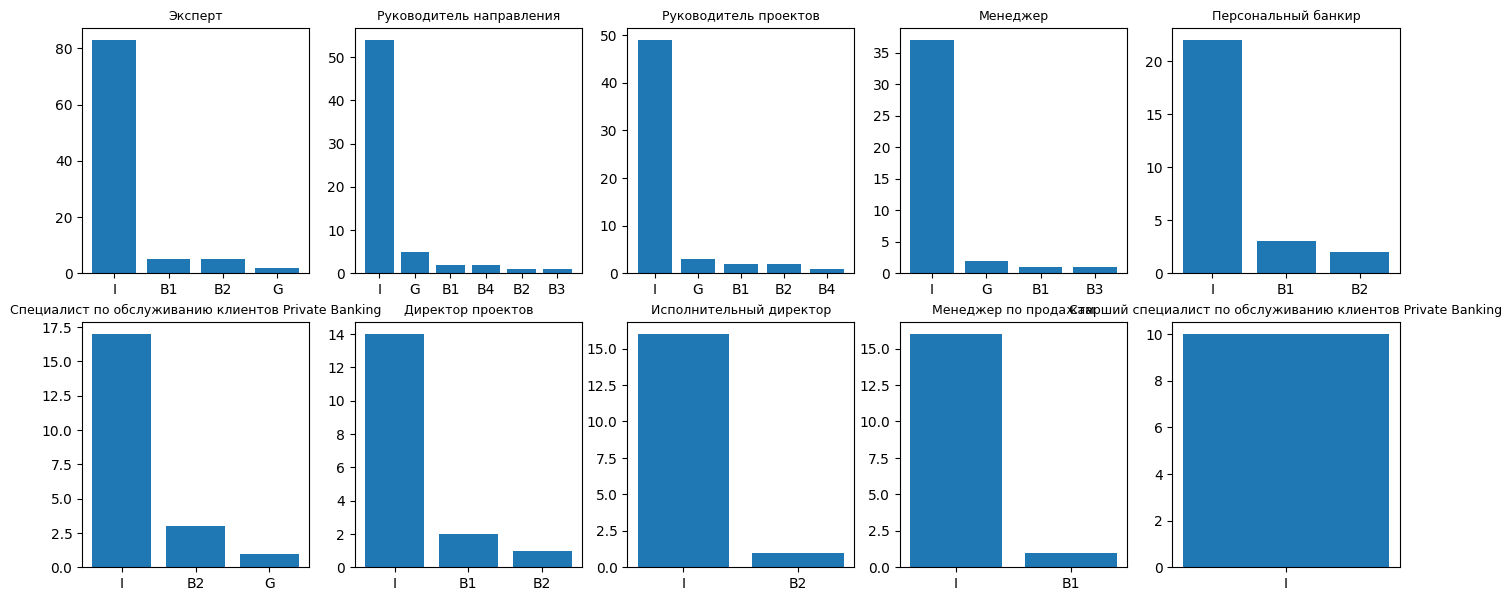

Блок Стратегия


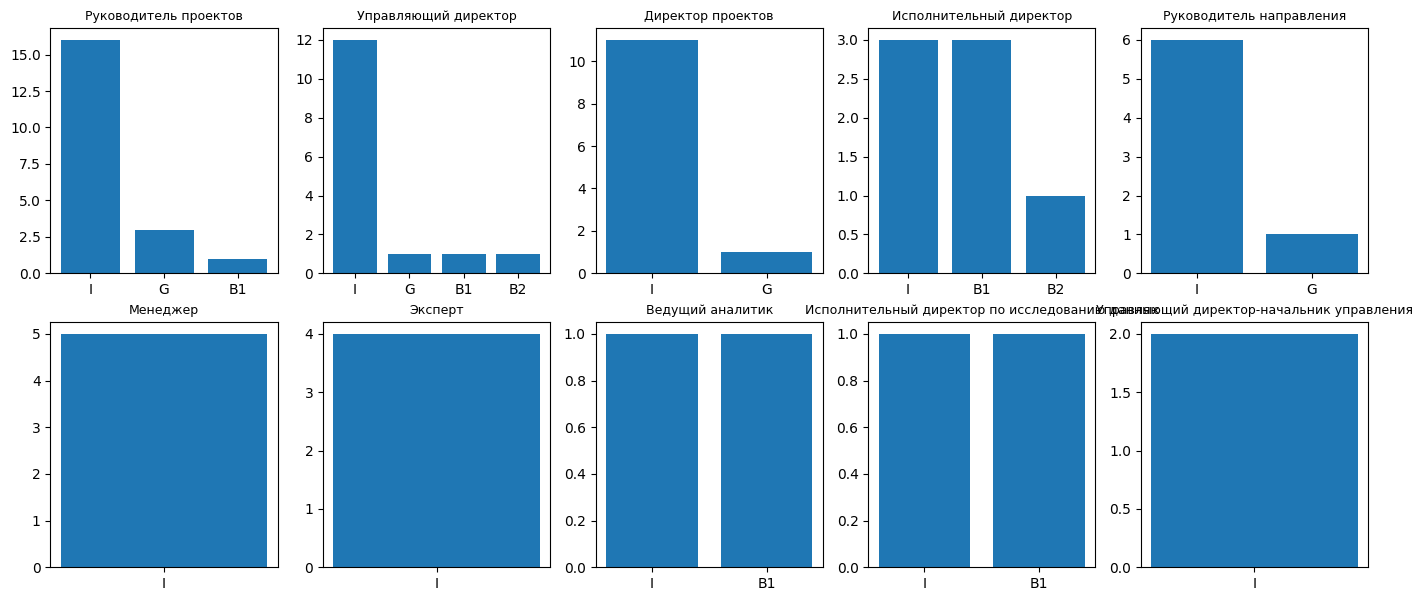

Блок Sberbank


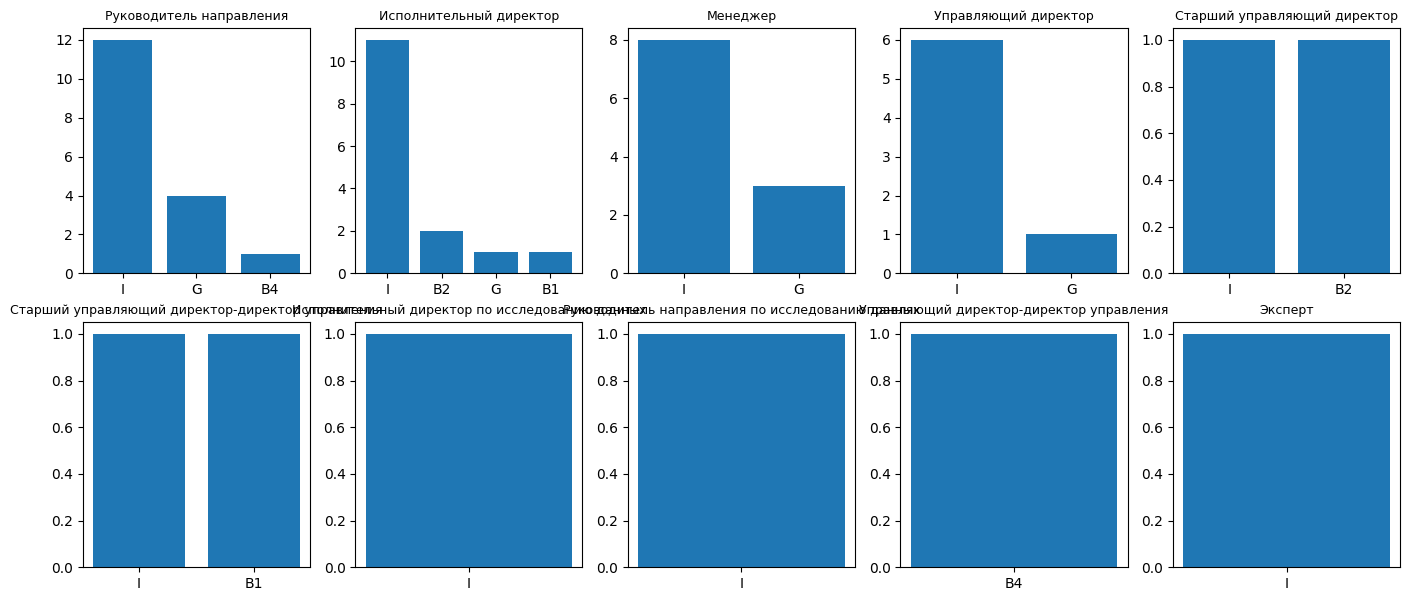

Старая структура


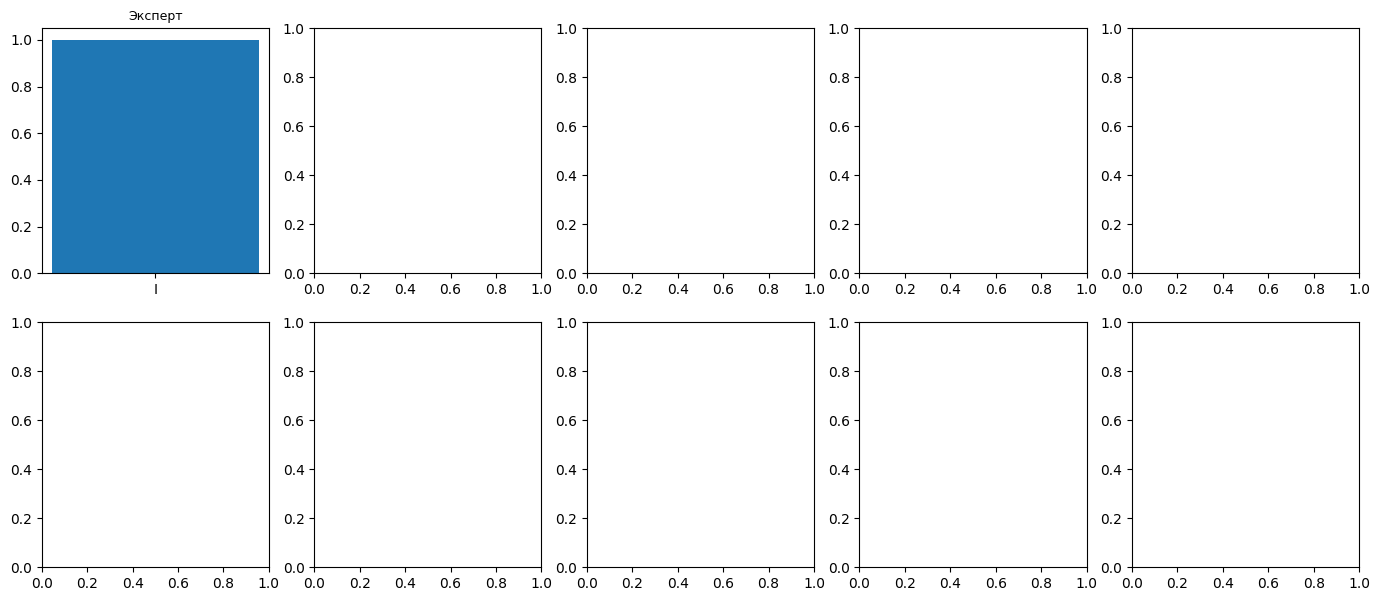

In [114]:
for department in table['Подразделение_3'].unique():
    department_stat(department)

# Подсчет без (0, 0, 0)

Выделение исходов без (0, 0, 0)

In [115]:
new_codes = [(0, 0, 1), (1, 0, 0), (1, 0, 1), (1, 1, 0), (1, 1, 1)]

Рассчет описания исходов по новому списку

In [116]:
new_possible_ends = {code: check_end(code) for code in new_codes}

Общее распределение исходов без учета (0, 0, 0)

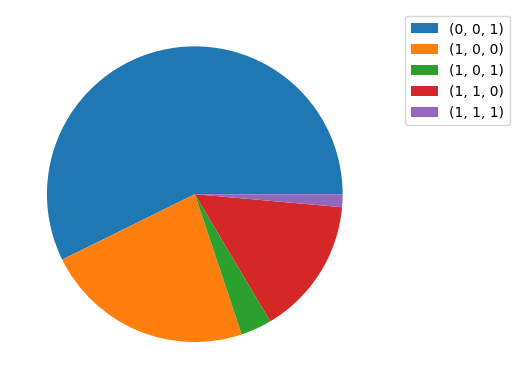

In [117]:
plt.pie([end.table_len for end in new_possible_ends.values()])

plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
plt.show()

Распределение исходов по топ 10 по популярности должностям без (0, 0, 0)

Руководитель направления


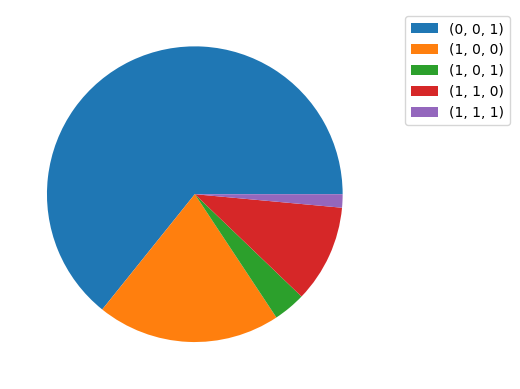

Главный инженер по разработке


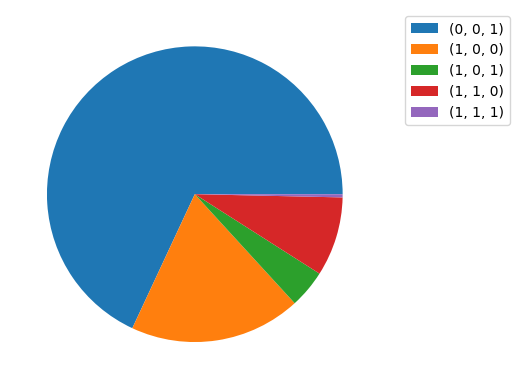

Исполнительный директор


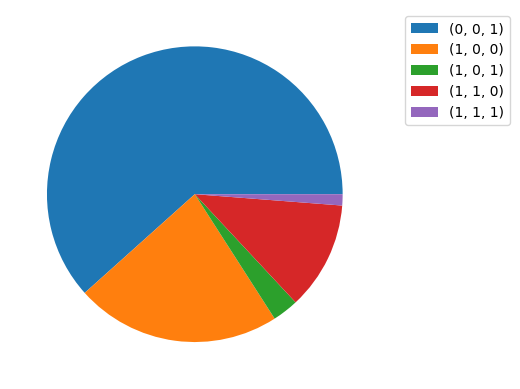

Менеджер


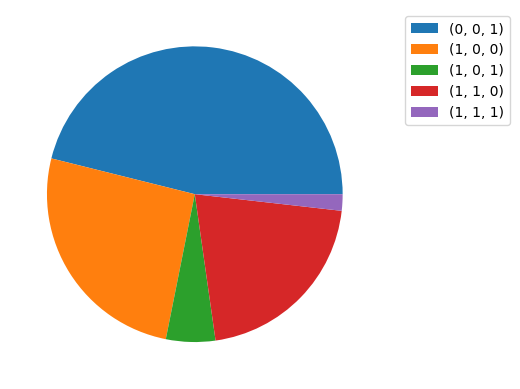

Эксперт


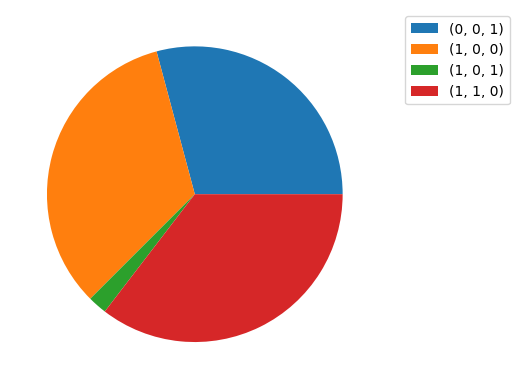

Руководитель проектов


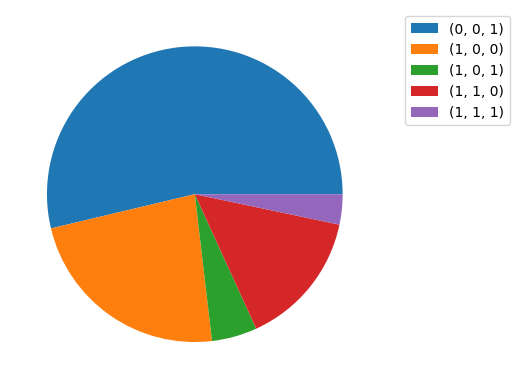

Ведущий инженер по разработке


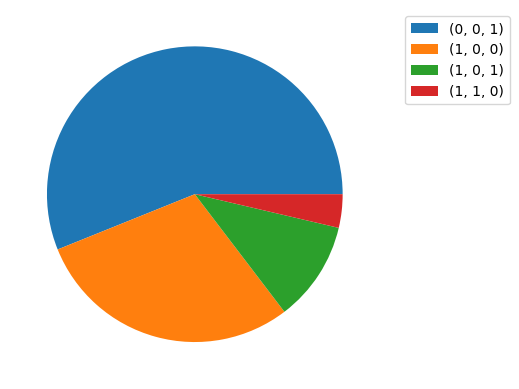

Главный инженер


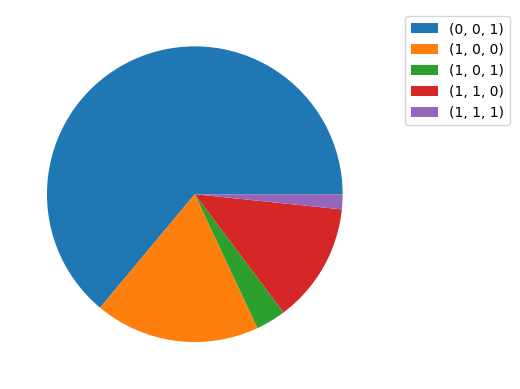

Ведущий инженер по сопровождению


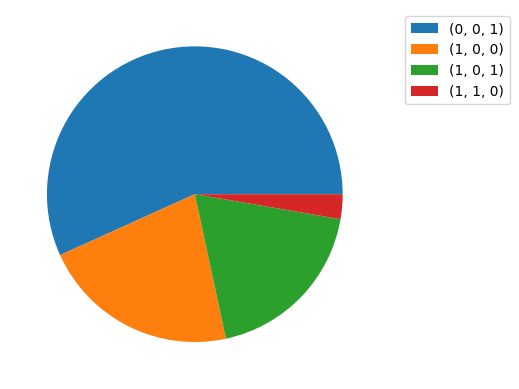

Ведущий инженер


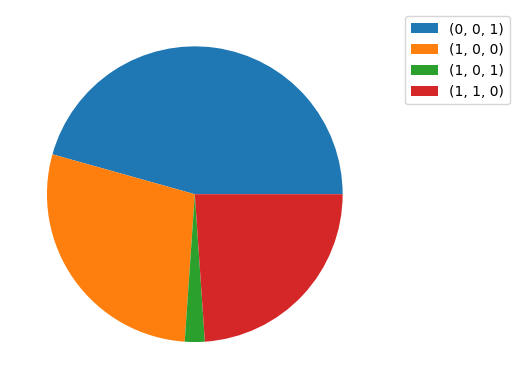

In [118]:
for worker in dict(top_workers).keys():
    print(worker)
    data_list = []
    for end in new_possible_ends.values():
        try:
            data_list.append(dict(end.worker_rate)[worker])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

Распределение исходов по блокам без (0, 0, 0)

Блок Технологии


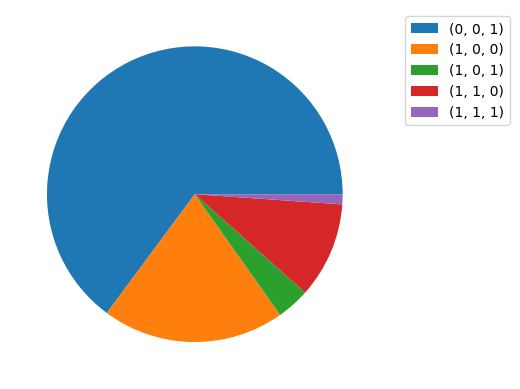

Блок Корпоративно-инвестиционный


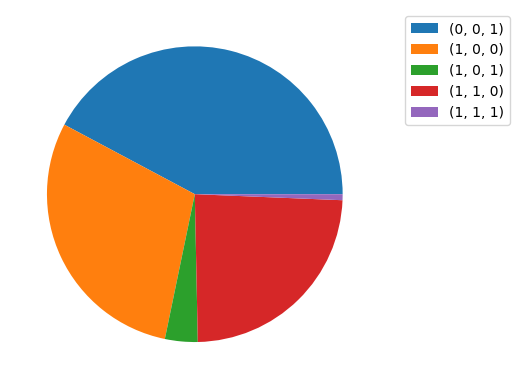

Блок Розничный


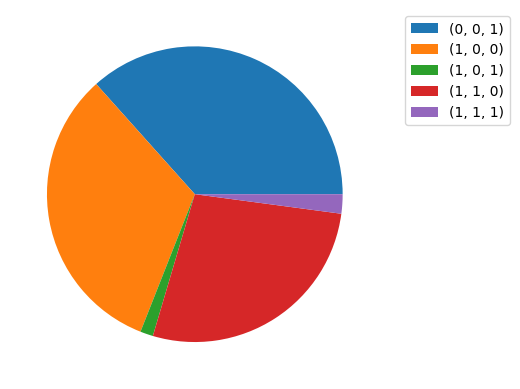

Блок Сервисы


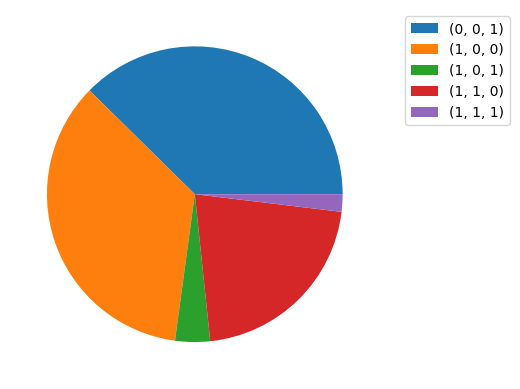

Блок Финансы


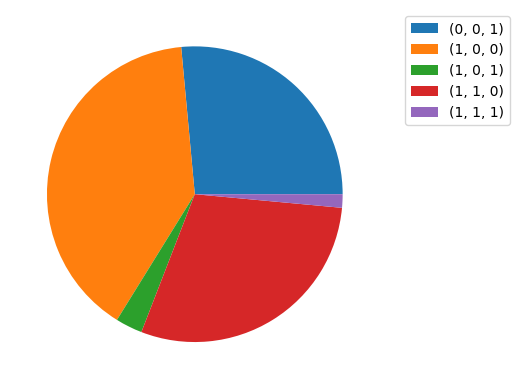

Другие подразделения


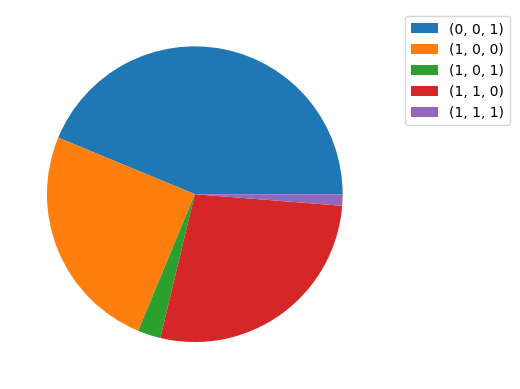

Подразделения вне


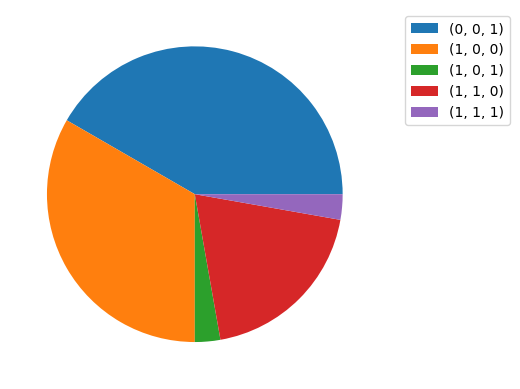

Блок Риски


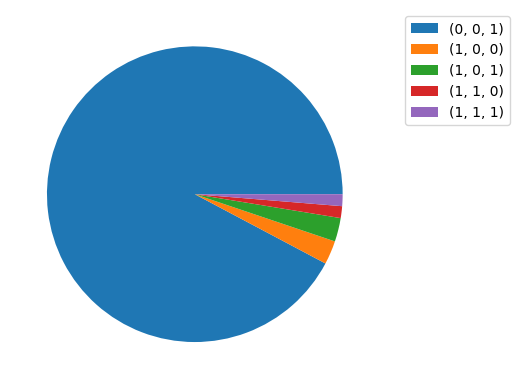

Блок Сеть


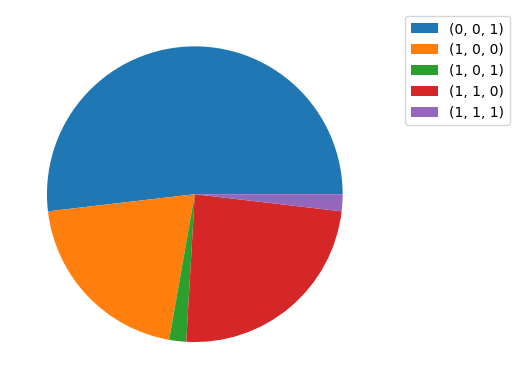

Блок Управление


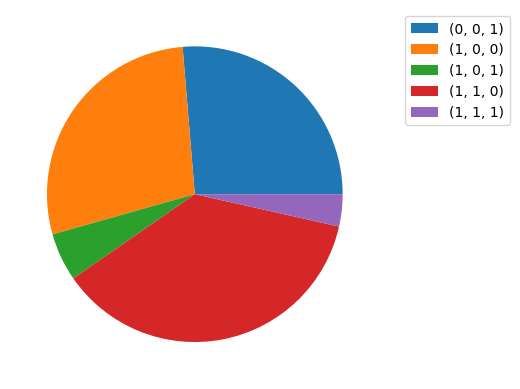

In [119]:
for department in dict(top_departments).keys():
    print(department)
    data_list = []
    for end in new_possible_ends.values():
        try:
            data_list.append(dict(end.department_rate)[department])
        except KeyError:
            pass
    plt.pie(data_list)
    plt.legend(new_codes, bbox_to_anchor=( 1.05 , 1 ), loc='upper left')
    plt.show()

# Подсчет вероятности наступления исхода

Подготовка таблицы

In [120]:
temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
6,Исполнительный директор,Блок Технологии,"(1, 0, 0)"
...,...,...,...
20578,Руководитель направления,Подразделения вне,"(0, 0, 0)"
20579,Руководитель направления,Блок Технологии,"(0, 0, 0)"
20580,Главный инженер по разработке,Блок Технологии,"(0, 0, 0)"
20583,Менеджер,Блок Технологии,"(0, 0, 0)"


In [121]:
temp_table['Исход'] = temp_table['Исход'].map(lambda cell: str(cell))

Функция для оценки вероятности наступления исхода

In [122]:
def get_probability_w(cur_end: tuple) -> dict:
    print(cur_end)
    cur_table = temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Оценка для топ-10 по популярности должностей

In [123]:
for end in possible_ends:
    cur_top = get_probability_w(end)
    for row in cur_top.items():
        print(f"Вероятность для {row[0]} - {row[1]}")

(0, 0, 0)
Вероятность для Руководитель направления - 0.83
Вероятность для Главный инженер по разработке - 0.88
Вероятность для Исполнительный директор - 0.82
Вероятность для Менеджер - 0.86
Вероятность для Эксперт - 0.89
Вероятность для Руководитель проектов - 0.86
Вероятность для Ведущий инженер по разработке - 0.90
Вероятность для Ведущий инженер по сопровождению - 0.93
Вероятность для Главный инженер - 0.88
Вероятность для Ведущий инженер - 0.91
(0, 0, 1)
Вероятность для Руководитель направления - 0.11
Вероятность для Главный инженер по разработке - 0.08
Вероятность для Исполнительный директор - 0.11
Вероятность для Менеджер - 0.07
Вероятность для Руководитель проектов - 0.08
Вероятность для Ведущий инженер по разработке - 0.06
Вероятность для Главный инженер - 0.08
Вероятность для Эксперт - 0.03
Вероятность для Ведущий инженер - 0.04
Вероятность для Ведущий инженер по сопровождению - 0.04
(1, 0, 0)
Вероятность для Руководитель направления - 0.03
Вероятность для Исполнительный дирек

In [124]:
def get_probability_w_full(cur_end: tuple) -> dict:
    print('\n')
    print('\n', cur_end, '\n', sep='')
    cur_table = full_temp_table.query(f'Исход == "{str(cur_end)}"')
    gen_col = dict(table.value_counts('Должность'))
    cur_col = dict(cur_table.value_counts('Должность'))
    return {worker: f"{cur_col[worker]/gen_col[worker]:0.2f}" for worker in cur_col.keys()}

Полная оценка для каждой должности

In [125]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_top = {key: float(val) for key, val in cur_top.items()}
    cur_top = dict(sorted(cur_top.items(), key=lambda item: item[1], reverse=True))
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values()))}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]}")
    except StatisticsError:
        pass




(0, 0, 0)


Средний показатель - 1.0

Вероятность для Ведущий аналитик данных - 1.0
Вероятность для Технолог - 1.0
Вероятность для Категорийный менеджер - 1.0
Вероятность для Главный специалист-полиграфолог - 1.0
Вероятность для Старший менеджер по крупнейшим клиентам - 1.0
Вероятность для Руководитель направления-старший финансовый контролер - 1.0
Вероятность для Старший специалист по обслуживанию клиентов Private Banking - 1.0
Вероятность для Ведущий инженер-разработчик - 1.0
Вероятность для Начальник управления - 1.0
Вероятность для Старший инженер-электрик - 1.0
Вероятность для Главный дизайнер - 1.0
Вероятность для Юрисконсульт - 1.0
Вероятность для Бизнес-менеджер - 1.0
Вероятность для Продуктовый менеджер - 1.0
Вероятность для Главный трейдер - 1.0
Вероятность для Уборщик - 1.0
Вероятность для Младший клиентский менеджер - 1.0
Вероятность для Ведущий специалист по продажам - 1.0
Вероятность для Инженер-электрик - 1.0
Вероятность для Медиатор - 1.0
Вероятность для ИТ-инженер -

Оценка наиболее уязвимых к фишингу должностей (от 5 и более человек в компании)

In [126]:
def check_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    cur_workers_col = {key: val for key, val in cur_workers_col.items() if val >= 5}
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)[:10]
        

In [127]:
bad_codes = [(1, 0, 0), (1, 1, 0), (1, 0, 1), (1, 1, 1)]

In [128]:
for code in bad_codes:
    print(code)
    cur_top = check_worker(code)
    for worker in cur_top:
        print(f"{worker[0]}: {worker[1]:0.2f}")
    print("\n")

(1, 0, 0)
Другое: 0.09
Управляющий директор-начальник управления: 0.08
Ведущий эксперт по технологиям: 0.05
Управляющий директор: 0.05
Исполнительный директор-начальник отдела: 0.05
Главный аналитик: 0.04
Директор проектов: 0.04
Исполнительный директор: 0.04
Менеджер: 0.04
Эксперт: 0.04


(1, 1, 0)
Старший специалист: 0.12
Главный юрисконсульт: 0.05
Ведущий специалист: 0.05
Ведущий инспектор: 0.05
Эксперт: 0.04
Старший инженер по разработке: 0.04
Управляющий директор: 0.03
Исполнительный директор-начальник отдела: 0.03
Менеджер: 0.03
Аналитик: 0.03


(1, 0, 1)
Менеджер: 0.01
Руководитель проектов: 0.01
Руководитель направления: 0.01
Главный инженер по разработке: 0.01
Исполнительный директор: 0.01


(1, 1, 1)
Руководитель направления: 0.00




Рассмотрение хорошего исхода

In [129]:
print("(0, 0, 1)")
cur_top = check_worker((0, 0, 1))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 1)
Управляющий директор-начальник центра: 0.32
Главный аудитор: 0.24
Главный специалист: 0.23
Исполнительный директор-начальник управления: 0.23
Ведущий исследователь данных: 0.17
Старший аналитик: 0.15
Ведущий специалист: 0.15
Главный аналитик: 0.13
Руководитель направления по аналитике данных: 0.12
Исполнительный директор-начальник отдела: 0.12


Рассмотрение варианта с игнорированием

In [130]:
print("(0, 0, 0)")
cur_top = check_worker((0, 0, 0))
for worker in cur_top:
    print(f"{worker[0]}: {worker[1]:0.2f}")

(0, 0, 0)
Ведущий аналитик данных: 1.00
Технолог: 1.00
Категорийный менеджер: 1.00
Главный специалист-полиграфолог: 1.00
Старший менеджер по крупнейшим клиентам: 1.00
Руководитель направления-старший финансовый контролер: 1.00
Старший специалист по обслуживанию клиентов Private Banking: 1.00
Ведущий инженер-разработчик: 1.00
Начальник управления: 1.00
Старший инженер-электрик: 1.00


Оценка наиболее уязвимых к фишингу блоков

In [131]:
def check_department(cur_end: tuple) -> list:
    gen_dep_col = table.value_counts('Подразделение_3')
    cur_dep_col = dict(possible_ends[cur_end].department_rate)
    dep_col_diff = defaultdict(float)
    for department in cur_dep_col:
        try:
            dep_col_diff[department] = cur_dep_col[department]/gen_dep_col[department]
        except KeyError:
            pass
        
    return sorted(dep_col_diff.items(), key=lambda item: item[1], reverse=True)

In [132]:
for code in bad_codes:
    print(code)
    cur_top = check_department(code)
    for department in cur_top:
        print(f"{department[0]}: {department[1]:0.2f}")
    print("\n")

(1, 0, 0)
Блок Стратегия: 0.10
Блок Сервисы: 0.06
Блок GR,: 0.05
Блок Финансы: 0.04
Подразделения вне: 0.04
Блок Корпоративно-инвестиционный: 0.04
Блок Управление: 0.04
Блок Розничный: 0.04
Блок Sberbank: 0.03
Другие подразделения: 0.03
Блок HR: 0.03
Блок Технологии: 0.03
Блок Сеть: 0.03
Блок Риски: 0.01


(1, 1, 0)
Блок Sberbank: 0.05
Блок Управление: 0.05
Блок Сервисы: 0.04
Другие подразделения: 0.04
Блок GR,: 0.03
Блок Корпоративно-инвестиционный: 0.03
Блок Финансы: 0.03
Блок Розничный: 0.03
Блок Сеть: 0.03
Подразделения вне: 0.02
Блок Стратегия: 0.02
Блок HR: 0.02
Блок Технологии: 0.01
Блок Риски: 0.01


(1, 0, 1)
Блок Sberbank: 0.03
Блок Риски: 0.01
Блок GR,: 0.01
Блок Управление: 0.01
Блок Сервисы: 0.01
Блок Корпоративно-инвестиционный: 0.00
Блок Технологии: 0.00
Подразделения вне: 0.00
Другие подразделения: 0.00
Блок Финансы: 0.00
Блок Сеть: 0.00
Блок Розничный: 0.00


(1, 1, 1)
Блок GR,: 0.01
Блок Риски: 0.01
Блок HR: 0.01
Блок Управление: 0.00
Подразделения вне: 0.00
Блок Серв

Рассмотрение хорошего исхода

In [133]:
print("(0, 0, 1)")
cur_top = check_department((0, 0, 1))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 1)
Блок Риски: 0.42
Блок Sberbank: 0.16
Блок Технологии: 0.09
Блок GR,: 0.08
Блок Стратегия: 0.07
Блок Сервисы: 0.07
Блок Сеть: 0.06
Другие подразделения: 0.06
Блок HR: 0.06
Блок Корпоративно-инвестиционный: 0.06
Подразделения вне: 0.05
Блок Розничный: 0.04
Блок Управление: 0.04
Блок Финансы: 0.03


Рассмотрение варианта с игнорированием

In [134]:
print("(0, 0, 0)")
cur_top = check_department((0, 0, 0))
for department in cur_top:
    print(f"{department[0]}: {department[1]:0.2f}")

(0, 0, 0)
Старая структура: 1.00
Блок Финансы: 0.89
Блок Розничный: 0.89
Блок HR: 0.88
Блок Сеть: 0.88
Подразделения вне: 0.87
Блок Технологии: 0.87
Другие подразделения: 0.87
Блок Корпоративно-инвестиционный: 0.86
Блок Управление: 0.86
Блок Сервисы: 0.82
Блок GR,: 0.82
Блок Стратегия: 0.80
Блок Sberbank: 0.72
Блок Риски: 0.55


Распределим сотрудников по группам. 1 группа - очень подвержены (x>0.75), 2 группа - скорее да, чем нет (0.5<x<0.75), 3 группа - скорее нет, чем да (0.25<x<0.5), 4 группа - наименее подвержены (x<0.25)

h - 1 группа
hm - 2 группа
ml - 3 группа
l - 4 группа

In [135]:
change_group = {'h': 'hm', 'hm': 'ml', 'ml': 'l'}
group_name = {'hm': 'Скорее да, чем нет', 'ml': 'Скорее нет, чем да','l': 'Наименее подвержены'}

In [136]:
for end in possible_ends:
    cur_top = get_probability_w_full(end)
    cur_group = 'h'
    next_group_chk = 0.75
    print('Наиболее подвержены\n')
    for row in cur_top.items():
        if float(row[1]) < next_group_chk:
            cur_group = change_group[cur_group]
            next_group_chk -= 0.25
            print('\n')
            print('\n', group_name[cur_group], '\n', sep='')
        print(row[0], end='; ')




(0, 0, 0)

Наиболее подвержены

Руководитель направления; Главный инженер по разработке; Исполнительный директор; Менеджер; Эксперт; Руководитель проектов; Ведущий инженер по разработке; Ведущий инженер по сопровождению; Главный инженер; Ведущий инженер; Главный инженер по сопровождению; Аналитик; Старший эксперт по технологиям; Директор проектов; Старший инженер по разработке; Старший инженер по сопровождению; Исполнительный директор-начальник отдела; Старший инженер; Управляющий директор; Ведущий аналитик; Ведущий эксперт по технологиям; Главный аналитик; Ведущий инспектор; Руководитель направления по исследованию данных; 


Скорее да, чем нет

Главный специалист; Управляющий директор-начальник управления; Ведущий эксперт; Главный эксперт; Старший аналитик; Главный юрисконсульт; Ведущий специалист; Инженер по разработке; Старший эксперт; Главный экономист; Главный инспектор; Исполнительный директор по исследованию данных; Старший инспектор; Бизнес-партнер по управлению персоналом;

Разделение на управляющий и рядовой состав

In [137]:
key_words = {'руководитель', 'директор', 'ведущий', 'главный', 'президент', 'начальник', 'советник'}
lead_workers = []

In [138]:
for worker in list(table['Должность'].unique()):
    cl_worker = "".join([ltr.lower() if ltr not in ['-', '.', ','] else ' ' for ltr in worker])
    if set(cl_worker.split()).intersection(key_words):
        lead_workers.append(worker)

In [139]:
len(lead_workers)

187

In [140]:
lead_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(lead_workers)]

In [141]:
lead_workers_df = pd.DataFrame(lead_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [142]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(lead_workers_df['Вероятность'])))

In [143]:
lead_workers_df['Вероятность'] = lead_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [144]:
lead_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.853
1,"(0, 0, 1)",0.089
2,"(1, 0, 0)",0.032
3,"(1, 1, 0)",0.019
4,"(1, 0, 1)",0.005
5,"(1, 1, 1)",0.002


In [145]:
simple_workers = set(table['Должность'].unique()).difference(set(lead_workers))

In [146]:
len(simple_workers)

107

In [147]:
simple_workers_table = full_temp_table.loc[full_temp_table['Должность'].isin(simple_workers)]

In [148]:
simple_workers_df = pd.DataFrame(simple_workers_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [149]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: int(cell)/sum(list(simple_workers_df['Вероятность'])))

In [150]:
simple_workers_df['Вероятность'] = simple_workers_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [151]:
simple_workers_df

,Исход,Вероятность
0,"(0, 0, 0)",0.877
1,"(0, 0, 1)",0.054
2,"(1, 0, 0)",0.033
3,"(1, 1, 0)",0.031
4,"(1, 0, 1)",0.004
5,"(1, 1, 1)",0.001


Подсчет вероятностей каждого исхода для управляющего и рядового состава

In [152]:
def check_lead_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in lead_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для руководящего состава

In [153]:
for end in possible_ends:
    cur_top = check_lead_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]:0.2f}")
    except StatisticsError:
        pass


(0, 0, 0)


Средний показатель - 1.00

Вероятность для Ведущий аналитик данных - 1.00
Вероятность для Главный специалист-полиграфолог - 1.00
Вероятность для Руководитель направления-старший финансовый контролер - 1.00
Вероятность для Ведущий инженер-разработчик - 1.00
Вероятность для Начальник управления - 1.00
Вероятность для Главный дизайнер - 1.00
Вероятность для Главный трейдер - 1.00
Вероятность для Ведущий специалист по продажам - 1.00
Вероятность для Руководитель проекта - 1.00
Вероятность для Управляющий директор-директор лаборатории - 1.00
Вероятность для Исполнительный директор-старший трейдер - 1.00
Вероятность для Ведущий специалист-полиграфолог - 1.00
Вероятность для Ведущий архитектор - 1.00
Вероятность для Исполнительный директор-начальник сектора - 1.00
Вероятность для Директор по сопровождению-начальник управления - 1.00
Вероятность для Руководитель проектов по развитию бизнеса - 1.00
Вероятность для Технический директор - 1.00
Вероятность для Ведущий инженер по энерг

In [154]:
def check_simple_worker(cur_end: tuple) -> list:
    gen_workers_col = table.value_counts('Должность')
    cur_workers_col = dict(possible_ends[cur_end].worker_rate)
    workers_col_diff = defaultdict(float)
    for worker in cur_workers_col:
        try:
            workers_col_diff[worker] = cur_workers_col[worker]/gen_workers_col[worker]
        except KeyError:
            pass
        
    workers_col_diff = list(map(lambda item: item if item[0] in simple_workers else "-", workers_col_diff.items()))
    workers_col_diff = [item for item in workers_col_diff if item != '-']
    workers_col_diff = {item[0]: item[1] for item in workers_col_diff}
    
    return sorted(workers_col_diff.items(), key=lambda item: item[1], reverse=True)

Рассчет вероятности для рядового состава

In [155]:
for end in possible_ends:
    cur_top = check_simple_worker(end)
    cur_top = {item[0]: float(item[1]) for item in cur_top}
    print('\n', end, '\n', sep='')
    try:
        print('\n', f'Средний показатель - {median(list(cur_top.values())):0.2f}', '\n', sep='')
        for row in cur_top.items():
            print(f"Вероятность для {row[0]} - {row[1]:0.2f}")
    except StatisticsError:
        pass


(0, 0, 0)


Средний показатель - 1.00

Вероятность для Технолог - 1.00
Вероятность для Категорийный менеджер - 1.00
Вероятность для Старший менеджер по крупнейшим клиентам - 1.00
Вероятность для Старший специалист по обслуживанию клиентов Private Banking - 1.00
Вероятность для Старший инженер-электрик - 1.00
Вероятность для Юрисконсульт - 1.00
Вероятность для Бизнес-менеджер - 1.00
Вероятность для Продуктовый менеджер - 1.00
Вероятность для Уборщик - 1.00
Вероятность для Младший клиентский менеджер - 1.00
Вероятность для Инженер-электрик - 1.00
Вероятность для Медиатор - 1.00
Вероятность для ИТ-инженер - 1.00
Вероятность для Инженер-механик - 1.00
Вероятность для Портфельный управляющий - 1.00
Вероятность для Менеджер по работе с ключевыми партнерами - 1.00
Вероятность для Сейлз - 1.00
Вероятность для Банкир - 1.00
Вероятность для Аудитор - 1.00
Вероятность для Специалист по операционной поддержке - 1.00
Вероятность для Старший инженер-разработчик - 1.00
Вероятность для Экономист - 1.

Построение вероятностного распределения для всех исходов

По оси X - всевозможные исходы при взаимодействии с письмом. (0, 0, 0); (0, 0, 1) и тд. По оси Y - вероятность для каждого исхода.

In [156]:
full_temp_table

,Должность,Подразделение_3,Исход
0,Ведущий инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
1,Главный инженер по сопровождению,Блок Технологии,"(0, 0, 0)"
2,Руководитель направления,Блок Риски,"(0, 0, 0)"
3,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
4,Исполнительный директор,Блок Технологии,"(0, 0, 0)"
...,...,...,...
20580,Главный инженер по разработке,Блок Технологии,"(0, 0, 0)"
20581,Старший эксперт по технологиям,Блок Технологии,"(0, 0, 1)"
20582,Директор проектов,Блок Сервисы,"(0, 0, 0)"
20583,Менеджер,Блок Технологии,"(0, 0, 0)"


In [157]:
prob_df = pd.DataFrame(full_temp_table.value_counts('Исход').items(), columns=['Исход', 'Вероятность'])

In [158]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",17665
1,"(0, 0, 1)",1673
2,"(1, 0, 0)",667
3,"(1, 1, 0)",440
4,"(1, 0, 1)",99
5,"(1, 1, 1)",41


In [159]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: int(cell)/sum(list(prob_df['Вероятность'])))

In [160]:
prob_df['Вероятность'] = prob_df['Вероятность'].map(lambda cell: float(f'{cell:0.3f}'))

In [161]:
prob_df

,Исход,Вероятность
0,"(0, 0, 0)",0.858
1,"(0, 0, 1)",0.081
2,"(1, 0, 0)",0.032
3,"(1, 1, 0)",0.021
4,"(1, 0, 1)",0.005
5,"(1, 1, 1)",0.002


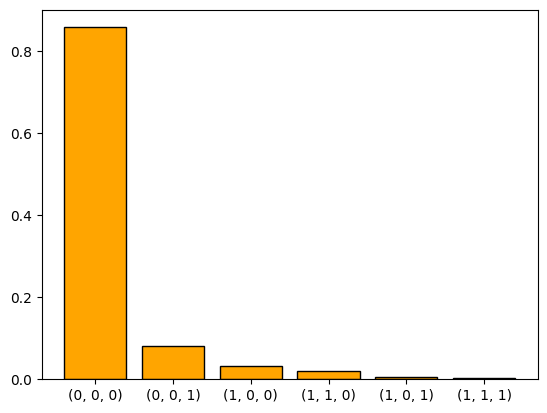

In [162]:
plt.bar(prob_df['Исход'], prob_df['Вероятность'], color = 'orange', edgecolor = 'black')

plt.show()